<a href="https://colab.research.google.com/github/mateus-abrantes/Regressao-linear-multipla/blob/main/RLM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Previsão de preços imobiliários


# Dados

In [129]:
#Importacao dos dados
import pandas as pd 
dados = pd.read_csv("insurance.csv")

In [128]:
#Analise previa dos dados
dados.head()

,age,sex,bmi,children,smoker,region,charges
0,19,2,27.900,0,1,2,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


In [130]:
#Tratamento dos dados do tipo string para numerico
gender = {'male': 1,'female': 2} 
dados.sex = [gender[item] for item in dados.sex] 
smoker = {'yes': 1,'no' : 0}
dados.smoker = [smoker[item] for item in dados.smoker] 
region = {'northeast': 0,'southeast' : 1, 'southwest':2,'northwest':3}
dados.region = [region[item] for item in dados.region] 
dados.head()

,age,sex,bmi,children,smoker,region,charges
0,19,2,27.900,0,1,2,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


# Análise de Correlação dos dados

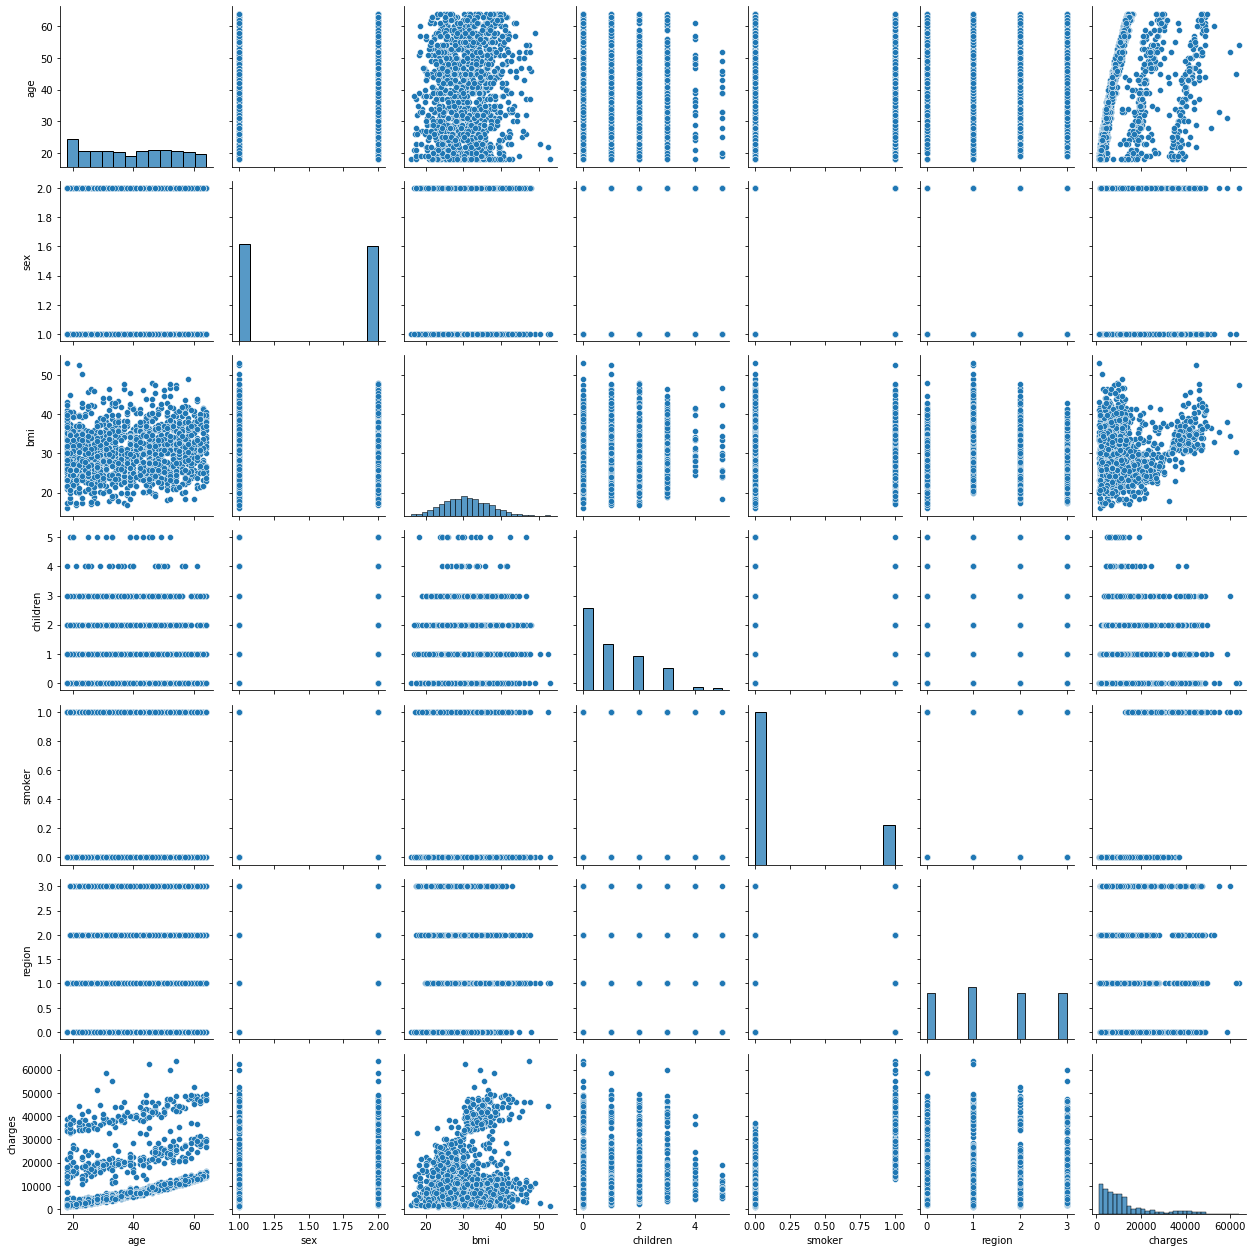

In [131]:
#Representacao grafica da correlacao dos dados
import matplotlib.pyplot as plt
import seaborn as sns 

sns.pairplot(dados) 
plt.tight_layout() 

In [132]:
#Valor numerico da correlacao entre os dados
dados.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.020856,0.109272,0.042469,-0.025019,0.002613,0.299008
sex,0.020856,1.000000,-0.046371,-0.017163,-0.076185,0.009346,-0.057292
bmi,0.109272,-0.046371,1.000000,0.012759,0.003750,-0.054428,0.198341
children,0.042469,-0.017163,0.012759,1.000000,0.007673,0.036617,0.067998
smoker,-0.025019,-0.076185,0.003750,0.007673,1.000000,-0.044124,0.787251
region,0.002613,0.009346,-0.054428,0.036617,-0.044124,1.000000,-0.050226
charges,0.299008,-0.057292,0.198341,0.067998,0.787251,-0.050226,1.000000


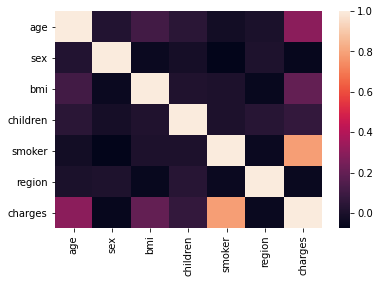

In [133]:
#Mapa de calor da correlacao dos dados
sns.heatmap(dados.corr())

# **Analise com todos os dados de entrada**

# Separacao entre dados de treinamento e teste

In [281]:
#Dados selecionados
X = dados.iloc[:,[0,1,2,3,4,5]].values 
y = dados.iloc[:,[6]].values

#Dados para treinamento e teste
X_train = X[0:800]
y_train = y[0:800]
X_test = X[800:] 
y_test = y[800:]

# Ajuste

In [282]:
from sklearn import  linear_model
from sklearn.metrics import mean_squared_error, r2_score

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

In [283]:
#Erro quadratico medio
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

Mean squared error: 38285001.10


In [284]:
#Score da varianca
print('Variance score: %.2f' % r2_score(y_test, y_pred)) 

Variance score: 0.75


In [285]:
#Coeficientes
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [[  261.49016663   229.14615069   320.17107883   402.60906291
  23876.52457562  -103.42222368]]


# **Analise com os dados com menor correlacao**



# Separacao entre dados de treinamento e teste

In [286]:
#Dados selecionados
X = dados.iloc[:,[3,5]].values 
y = dados.iloc[:,[6]].values

#Dados para treinamento e teste
X_train = X[0:800]
y_train = y[0:800]
X_test = X[800:] 
y_test = y[800:]

# Ajuste

In [287]:
from sklearn import  linear_model
from sklearn.metrics import mean_squared_error, r2_score

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

In [288]:
#Erro quadratico medio
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

Mean squared error: 149131305.33


In [289]:
#Score da varianca
print('Variance score: %.2f' % r2_score(y_test, y_pred)) 

Variance score: 0.01


In [290]:
#Coeficientes
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [[ 622.5870157  -395.84183157]]


# **Analise com os dados com maior correlacao**



# Separacao entre dados de treinamento e teste

In [308]:
#Dados selecionados
X = dados.iloc[:,[0,2,4]].values 
y = dados.iloc[:,[6]].values

#Dados para treinamento e teste
X_train = X[0:800]
y_train = y[0:800]
X_test = X[800:] 
y_test = y[800:]

# Ajuste

In [309]:
from sklearn import  linear_model
from sklearn.metrics import mean_squared_error, r2_score

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

In [310]:
#Erro quadratico medio
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

Mean squared error: 38737480.74


In [311]:
#Score da varianca
print('Variance score: %.2f' % r2_score(y_test, y_pred)) 

Variance score: 0.74


In [312]:
#Coeficientes
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [[  263.54209625   323.56362338 23854.77015663]]


# **Resultados**


1.   Com todos os campos de entrada obteve um score de variancia de cerca de 0.75
2.   Com os valores de entrada menos correlacionados tivemos um score de variancia de 0.01
3.   Com os valores de entrada mais correlacionados tivemos um score de variancia de 0.74

